In [1]:
from glob import glob
import cv2
import random
import os
%matplotlib inline
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from IPython.display import SVG, Image
import tensorflow as tf

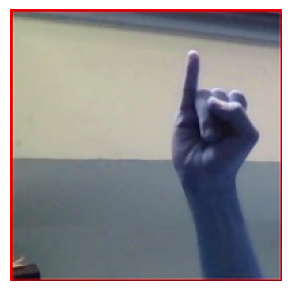

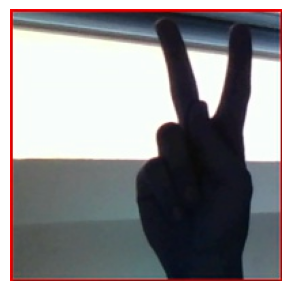

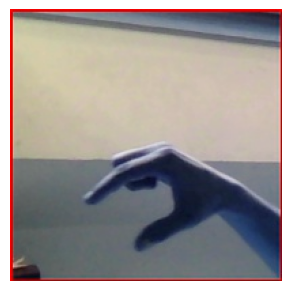

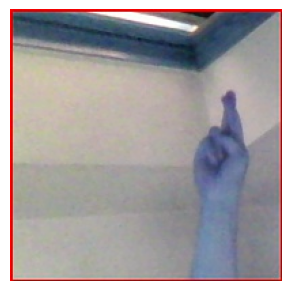

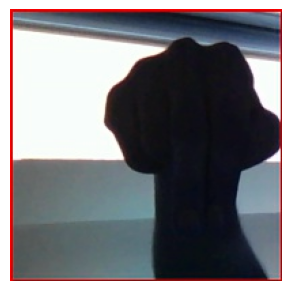

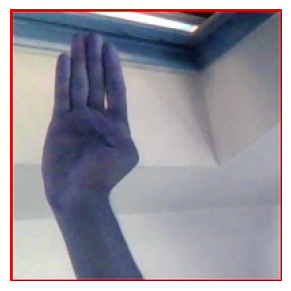

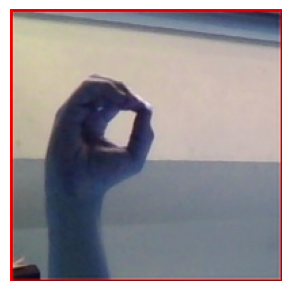

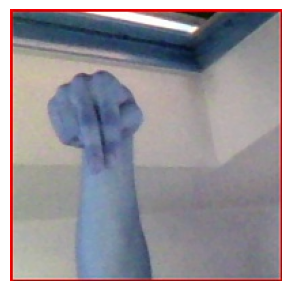

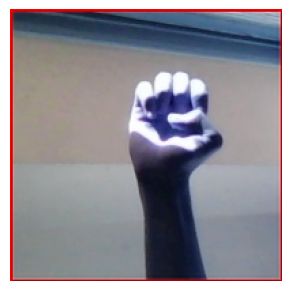

In [2]:
images = glob("train/**/**")
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

In [28]:
#ImgSize = 64
BatchSize = 32
NumClasses = 29 
DatagenTrain = ImageDataGenerator(rescale=1.0/255)
TrainGenerator = DatagenTrain.flow_from_directory("train/",
                                                   target_size = (48,48),
                                                   color_mode = "grayscale",
                                                   batch_size = BatchSize,
                                                   class_mode = "categorical",
                                                   shuffle = True)

DatagenValidation = ImageDataGenerator(rescale=1.0/255)
ValidationGenerator = DatagenTrain.flow_from_directory(r"C:\Users\LENEVO\OneDrive\Desktop\7th sem\EMEL\test",
                                                   target_size = (48,48),
                                                   color_mode = "grayscale",
                                                   batch_size = BatchSize,
                                                   class_mode = "categorical",
                                                   shuffle = True)

Found 87000 images belonging to 29 classes.
Found 29 images belonging to 29 classes.


In [29]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x

In [30]:

def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [31]:
def Convolution(x, filters, kernel_size, activation="relu"):
    x = Conv2D(filters, kernel_size, activation=activation, padding="same")(x)
    x = BatchNormalization()(x)  # Optional, helps with stability
    x = MaxPooling2D(pool_size=(2, 2))(x)  # Optional, for down-sampling
    return x

def Dense_f(x, units, activation="relu"):
    x = Dense(units, activation=activation)(x)
    return x

# Model function
def model_fer(input_shape):
    # Input layer
    inputs = Input(input_shape)
    
    # Convolutional layers
    conv_1 = Convolution(inputs, 32, (3, 3))
    conv_2 = Convolution(conv_1, 64, (5, 5))
    conv_3 = Convolution(conv_2, 128, (3, 3))

    # Flatten layer
    flatten = Flatten()(conv_3)
    
    # Dense layer
    dense_1 = Dense_f(flatten, 256)

    # Output layer - change the units to match the number of classes
    output = Dense(29, activation="softmax")(dense_1)

    # Model definition
    model = Model(inputs=[inputs], outputs=[output])
    
    # Compile the model
    model.compile(
        loss='categorical_crossentropy', 
        optimizer='adam', 
        metrics=["accuracy"]
    )

    return model

In [32]:
epochs = 15
steps_per_epoch = TrainGenerator.n//TrainGenerator.batch_size
ValidationSteps = ValidationGenerator.n//ValidationGenerator.batch_size

checkpoint = ModelCheckpoint("model_weight.weights.h5", monitor  ='val_accuracy', save_weights_only = True, mode = 'max', verbose =1)
callbacks = [checkpoint]

In [33]:
model = model_fer((48,48,1))
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 24, 24, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 29)             │         7,453 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,313,693 (5.01 MB)

 Trainable params: 1,313,245 (5.01 MB)

 Non-trainable params: 448 (1.75 KB)

In [34]:
history = model.fit(
x = TrainGenerator,
steps_per_epoch = steps_per_epoch,
epochs = epochs,
validation_data = ValidationGenerator,
validation_steps = ValidationSteps,
callbacks = callbacks)


Epoch 1/15
2718/2718 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.6534 - loss: 1.2203
Epoch 1: saving model to model_weight.weights.h5
2718/2718 ━━━━━━━━━━━━━━━━━━━━ 336s 123ms/step - accuracy: 0.6535 - loss: 1.2200 - val_accuracy: 0.9310 - val_loss: 0.3903
Epoch 2/15
   1/2718 ━━━━━━━━━━━━━━━━━━━━ 4:16 95ms/step - accuracy: 0.9375 - loss: 0.1226
Epoch 2: saving model to model_weight.weights.h5
2718/2718 ━━━━━━━━━━━━━━━━━━━━ 0s 71us/step - accuracy: 0.9375 - loss: 0.1226 - val_accuracy: 0.9310 - val_loss: 0.4522
Epoch 3/15


c:\Users\LENEVO\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2718/2718 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9755 - loss: 0.0802
Epoch 3: saving model to model_weight.weights.h5
2718/2718 ━━━━━━━━━━━━━━━━━━━━ 279s 103ms/step - accuracy: 0.9755 - loss: 0.0802 - val_accuracy: 0.9655 - val_loss: 0.1192
Epoch 4/15
   1/2718 ━━━━━━━━━━━━━━━━━━━━ 4:03 90ms/step - accuracy: 1.0000 - loss: 0.0305
Epoch 4: saving model to model_weight.weights.h5
2718/2718 ━━━━━━━━━━━━━━━━━━━━ 0s 46us/step - accuracy: 1.0000 - loss: 0.0305 - val_accuracy: 0.9655 - val_loss: 0.1288
Epoch 5/15
2718/2718 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.9864 - loss: 0.0438
Epoch 5: saving model to model_weight.weights.h5
2718/2718 ━━━━━━━━━━━━━━━━━━━━ 286s 105ms/step - accuracy: 0.9864 - loss: 0.0438 - val_accuracy: 1.0000 - val_loss: 1.0022e-04
Epoch 6/15
   1/2718 ━━━━━━━━━━━━━━━━━━━━ 4:11 93ms/step - accuracy: 0.9375 - loss: 0.3093
Epoch 6: saving model to model_weight.weights.h5
2718/2718 ━━━━━━━━━━━━━━━━━━━━ 0s 44us/step - accuracy: 0.9375 - loss: 0.3093 - val

In [35]:
model.evaluate(ValidationGenerator)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 1.0000 - loss: 1.9320e-07


[1.9320076205531223e-07, 1.0]

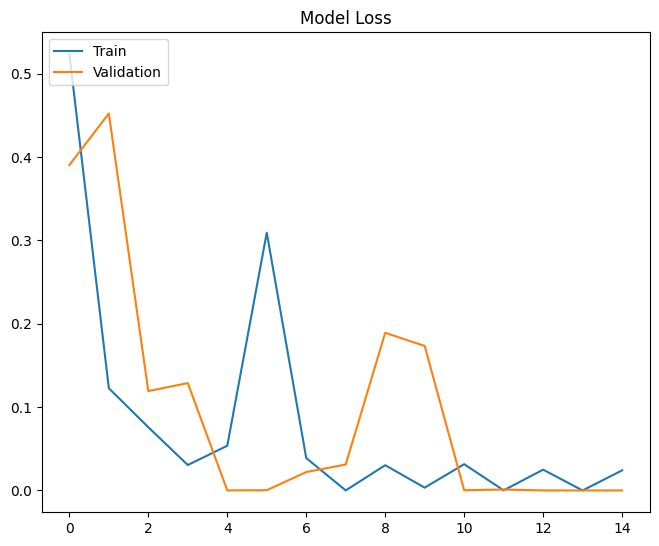

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

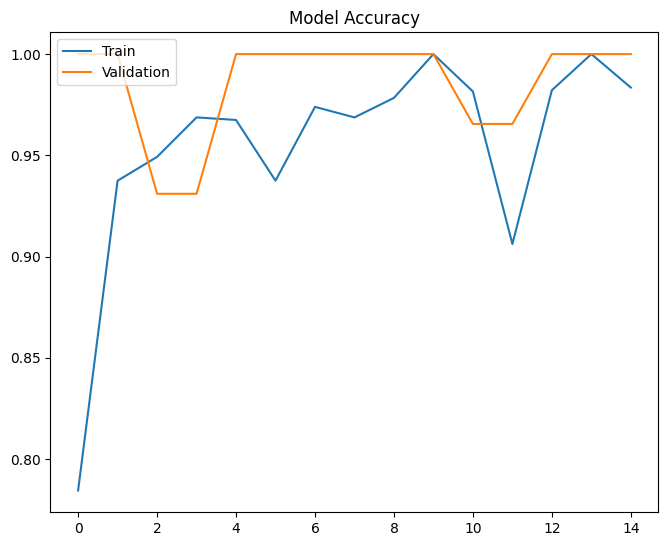

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

In [37]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)